In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC


iris = datasets.load_iris()
X = iris['data'][:, (2,3)]
y = (iris['target'] == 2).astype(np.float64)

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge')),
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [3]:
svm_clf.predict([[5.5, 1.7]])

array([ 1.])

### Nonlinear SVM Classification

#### Linear SVM classification using polynomial features

In [54]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))
])

polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

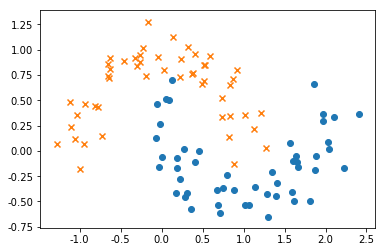

In [55]:
from matplotlib import pyplot as plt
%matplotlib inline 
plt.scatter(X[y==1][:,0],X[y==1][:,1], marker='o')
plt.scatter(X[y==0][:,0],X[y==0][:,1], marker='x')

In [56]:
x0_min, x1_min = X.min(axis=0)
x0_max, x1_max = X.max(axis=0)

x0s = np.linspace(x0_min, x0_max, np.int((x0_max-x0_min)*10))
x1s = np.linspace(x1_min, x1_max, np.int((x1_max-x1_min)*10))

x0, x1 = np.meshgrid(x0s, x1s)

X_grid = np.c_[x0.ravel(), x1.ravel()]
y_pred = polynomial_svm_clf.predict(X_grid)
y_decision = polynomial_svm_clf.decision_function(X_grid) #概率等高线

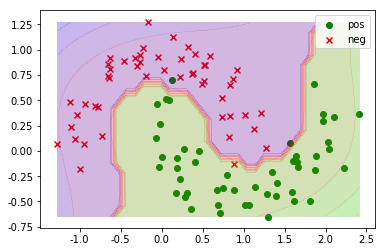

In [61]:
plt.scatter(X[y==1][:,0],X[y==1][:,1], marker='o', c='g', label='pos')
plt.scatter(X[y==0][:,0],X[y==0][:,1], marker='x', c='r', label='neg')

plt.contourf(x0, x1, y_pred.reshape(x0.shape), cmap=plt.cm.brg, alpha=0.2)
plt.contourf(x0, x1, y_decision.reshape(x0.shape), cmap=plt.cm.brg, alpha=0.1)

plt.legend()

#### Polynomial Kernel

In [ ]:
from sklearn.svm import svc

poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)